In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [24]:
file = 'graphene/standard_cell_pbc/kronig_penney_break_even/TG_hr_with_atom_coord.dat'
structure = np.loadtxt(file, usecols=(3,5,6,7,11,12,13))
df = pd.DataFrame(structure)
column_name = 0
df = df.drop_duplicates(subset=column_name)
x = df[1]
x_direct = df[4]
y = df[2]

## Kronig Penney break even symmetry

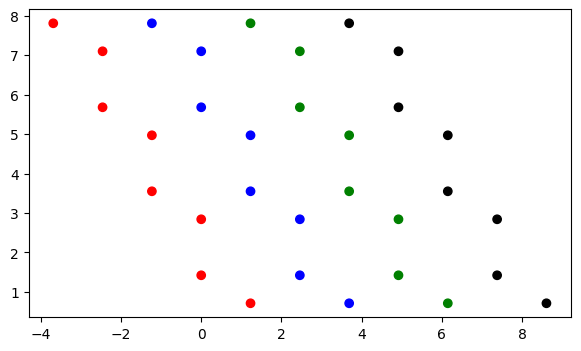

In [17]:
b = 0.5
U0 =  5
perturb = 0.1 * U0/2.0
start1 = 0.25
end1 = 0.5
start2 = 0.5
end2 = 0.75

colors = []
potential = []
for i in range(len(x_direct)):
    if 0 <= x_direct.iloc[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct.iloc[i] < end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct.iloc[i] < end2):
        V -= perturb
        color = 'green'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors)
plt.show()


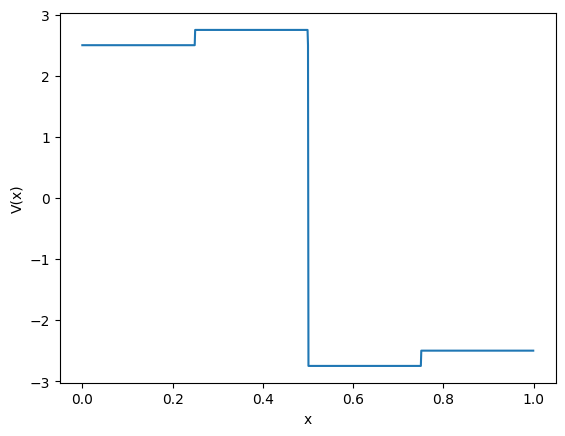

In [18]:
colors = []
x_direct = np.arange(0,1,0.001)
positions_and_potentials = []

for i in range(len(x_direct)):
    if 0 <= x_direct[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct[i] <= end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct[i] <= end2):
        V -= perturb
        color = 'green'

    positions_and_potentials.append((x_direct[i], V))

sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()


## Kronig Penney break odd symmetry

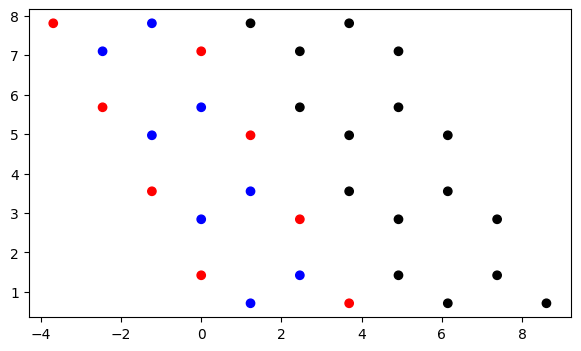

In [15]:
b = 0.5
U0 =  5
perturb = 0.1 * U0/2.0
start1 = 0.125
end1 = 0.375

colors = []
potential = []
for i in range(len(x_direct)):
    if 0 <= x_direct.iloc[i] < b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct.iloc[i] < end1):
        V += perturb
        color = 'blue'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors)
plt.show()


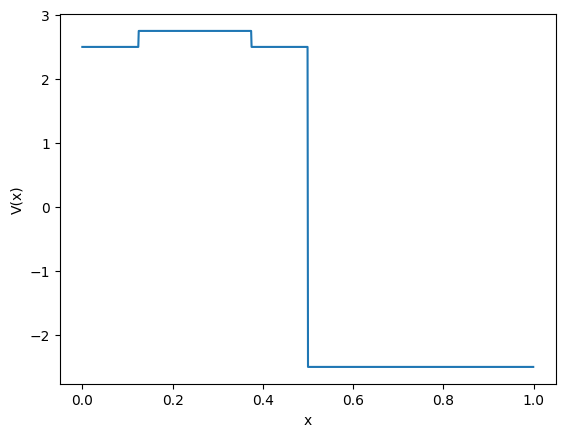

In [12]:
colors = []
x_direct = np.arange(0,1,0.001)
positions_and_potentials = []

for i in range(len(x_direct)):
    if 0 <= x_direct[i] < b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct[i] < end1):
        V += perturb
        color = 'blue'

    positions_and_potentials.append((x_direct[i], V))

sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()


## Sinusoidal potential

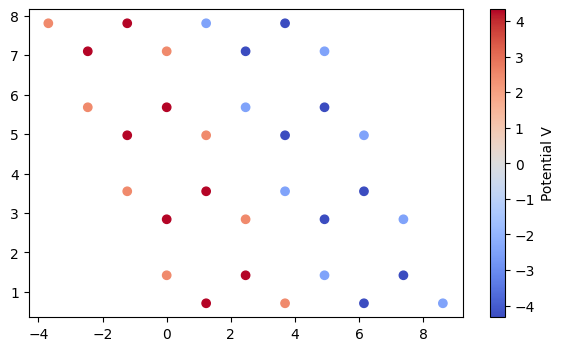

In [25]:
b = 0.5
U0 = 5
colors = []
potential = []
for i in range(len(x_direct)):
    V = U0 * np.sin(2 * np.pi * x_direct.iloc[i])
    potential.append(V)

# Normalize the potential values to be between 0 and 1 for coloring
norm = plt.Normalize(min(potential), max(potential))
cmap = plt.get_cmap('coolwarm')  # Selecting the colormap

plt.figure(figsize=(7, 4))
plt.scatter(x, y, c=potential, cmap=cmap, norm=norm)
plt.colorbar(label='Potential V')  # Add a color bar to show the potential scale
plt.show()


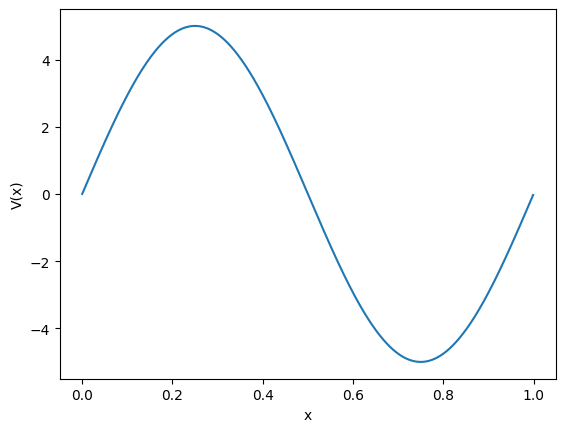

In [20]:
colors = []
x_direct = np.arange(0,1,0.001)
positions_and_potentials = []

for i in range(len(x_direct)):
    V = U0 * np.sin(2*np.pi*x_direct[i])
    if V >= 0:
        color = 'red'
    else:
        color = 'black'

    positions_and_potentials.append((x_direct[i], V))

sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()
